# Импорт библиотек

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных

In [3]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')

# Разведочный анализ данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Анализ целевой переменной

*Каково соотношение людей, которые пропускают приемы, к тем, кто этого не делает?*

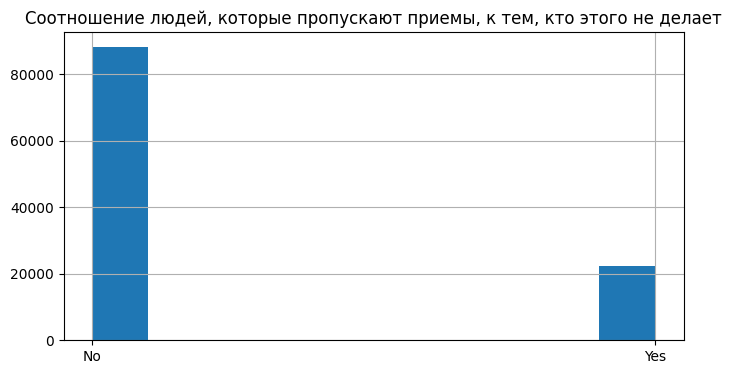

In [5]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [6]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

*Кто не появляется чаще — мужчины или женщины?*

In [7]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

# Предобработка данных

**Кодировка категориальных признаков**

In [8]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [9]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

**Обработка пропусков в данных**

In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Нам повезло — в нашем наборе данных нет нулевых значений.

In [11]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [12]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(level=logging.DEBUG)

In [13]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [14]:
logging.FileHandler('data/log_file.log')

<FileHandler c:\Python\win-pc\data\log_file.log (NOTSET)>

In [15]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-05-17 17:55:47,580: Check


In [17]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [18]:
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2023-05-17 17:58:46,427: Data
INFO: 2023-05-17 17:58:46,429: Data shape (110527, 14)
INFO: 2023-05-17 17:58:46,451: Percentage of women: 0.653882342398853
INFO: 2023-05-17 17:58:46,467: Percentage of men: 0.346117657601147


In [19]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2023-05-17 17:59:27,424: Data shape is incorrect!


In [ ]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="yiFKZg3wKteliE7s4MuSmYcCm",
    project_name="medical-appointment",
    workspace="bulatpython",
    )

DEBUG: 2023-05-17 18:07:08,021: No INI file found: []
DEBUG: 2023-05-17 18:07:08,029: No INI file found: ['./.comet.config']
DEBUG: 2023-05-17 18:07:08,029: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-05-17 18:07:08,029: No INI file found: ['~/.comet.config']
DEBUG: 2023-05-17 18:07:08,029: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-05-17 18:07:08,029: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-05-17 18:07:08,029: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-05-17 18:07:08,029: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-05-17 18:07:08,029: Found nothing--returning NO_VALUE
DEBUG: 2023-05-17 18:07:08,037: No INI file found: []
DEBUG: 2023-05-17 18:07:08,037: No INI file found: ['./.comet.config']
DEBUG: 2023-05-17 18:07:08,037: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-05-17 18:07:08,037: No INI file found: ['~/.come

DEBUG: 2023-05-17 18:07:14,673: https://www.comet.com:443 "POST /api/rest/v2/write/experiment/git/metadata HTTP/1.1" 200 55
DEBUG: 2023-05-17 18:07:14,838: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/output HTTP/1.1" 200 55
DEBUG: 2023-05-17 18:07:14,994: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-05-17 18:07:20,279: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-05-17 18:07:20,285: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-05-17 18:07:20,285: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-05-17 18:07:20,285: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-05-17 18:07:20,285: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-05-17 18:07:20,285: Found nothing--returning NO_VALUE
DEBUG: 2023-05-17 18:07:2